## 차량 속도 측정 예제(쉬운 칼만 필터 예제)
차량 초기속도 : 50m/s

속도 변화 : 평균 0, 표준편차 10, 매 0.1초마다 갱신

잡음 : 평균 0, 표준편차 2

### 시스템 모델
$x = \begin{Bmatrix}위치\\속도 \end{Bmatrix}$

$x_{k+1} = Ax_k + w_k$

$z_{k} = Hx_k + v_k$

$A = \begin{bmatrix} 1&\Delta t \\ 0 & 1\end{bmatrix}$

$H = \begin{bmatrix} 0&1 \end{bmatrix}$

In [2]:
# 데이터 생성
import numpy as np

dt = 0.1

meas_pos = []
true_velo = []
def make_data(t):
    step = int(t/dt)
    pos_p = 0
    vel_p = 50
    for i in range(step):
        dv = np.random.normal(0, 10)
        v = np.random.normal(0, 2)
        z = pos_p + vel_p*dt + v
        pos_p = z - v
        vel_p += dv
        meas_pos.append(z)
        true_velo.append(vel_p)
make_data(10)


In [3]:
from numpy.linalg import inv

esti_pos = []
esti_velo = []

# 칼만 필터 함수
def kalman_filter(z_datas):
    # 초기값 설정
    A = np.array([[1, dt], [0, 1]])
    H = np.array([[1, 0]])
    Q = np.array([[1, 0],[0, 3]])
    R = 10;
    x = np.array([[0, 20]]).T   # 초기 속도 20m/s로 설정
    P = 5*np.eye(2)
    for z in z_datas:
        x_p = A@x
        P_p = A@P@A.T + Q
        
        K = (P_p@H.T)/(H@P_p@H.T + R)
        x = x_p + K@(z - H@x_p)
        P = P_p - K@H@P_p
        esti_pos.append(x[0])
        esti_velo.append(x[1])

kalman_filter(meas_pos)

Text(0, 0.5, 'Position[m]')

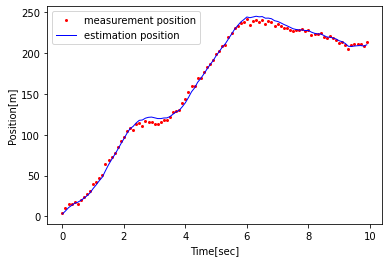

In [4]:
from matplotlib import pyplot as plt

times = [i*dt for i in range(int(10/dt))]

plt.plot(times, meas_pos, 'ro', markersize=2, label='measurement position')
plt.plot(times, esti_pos, 'b-', linewidth=1, label='estimation position')
plt.legend()
plt.xlabel('Time[sec]')
plt.ylabel('Position[m]')

Text(0, 0.5, 'Velocity[m/s]')

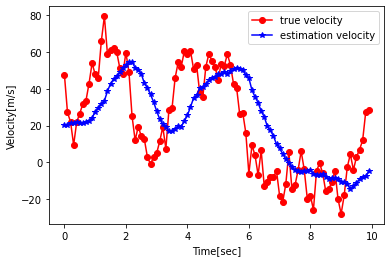

In [5]:
plt.plot(times, true_velo, 'ro-', label = 'true velocity')
plt.plot(times, esti_velo, 'b*-', label = 'estimation velocity')
plt.legend()
plt.xlabel('Time[sec]')
plt.ylabel('Velocity[m/s]')